# Problem Statement 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns


## 1.Load the dataset, check its shape

In [2]:
data = pd.read_csv("C:/Users/MANISH/python/Consumo_cerveja.csv")

In [3]:
data=data.rename(columns={"Data":"Date","Temperatura Media (C)":"Average temperature","Temperatura Minima (C)":"Minimum temperature",
                          "Temperatura Maxima (C)":"Maximum temperature","Precipitacao (mm)":"Precipitation in mm",
                         "Final de Semana":"Weekend","Consumo de cerveja (litros)":"Beer cunsumption"})
data.head()

,Date,Average temperature,Minimum temperature,Maximum temperature,Precipitation in mm,Weekend,Beer cunsumption
0,01-01-2015,"27,3","23,9","32,5",0,0,25.461
1,02-01-2015,"27,02","24,5","33,5",0,0,28.972
2,03-01-2015,"24,82","22,4","29,9",0,1,30.814
3,04-01-2015,"23,98","21,5","28,6","1,2",1,29.799
4,05-01-2015,"23,82",21,"28,3",0,0,28.900


In [6]:
data.shape

(365, 7)

## 2.Rectify the data of the first four columns 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Average temperature  365 non-null    object 
 2   Minimum temperature  365 non-null    object 
 3   Maximum temperature  365 non-null    object 
 4   Precipitation in mm  365 non-null    object 
 5   Weekend              365 non-null    int64  
 6   Beer cunsumption     365 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.1+ KB


## 5.Check the data typeof the features and convert them to the appropriate data type

In [8]:
data["Average temperature"]=data["Average temperature"].str.replace(',','.').astype(float)
data["Minimum temperature"]=data["Minimum temperature"].str.replace(',','.').astype(float)
data["Maximum temperature"]=data["Maximum temperature"].str.replace(',','.').astype(float)
data["Precipitation in mm"]=data["Precipitation in mm"].str.replace(',','.').astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Average temperature  365 non-null    float64
 2   Minimum temperature  365 non-null    float64
 3   Maximum temperature  365 non-null    float64
 4   Precipitation in mm  365 non-null    float64
 5   Weekend              365 non-null    int64  
 6   Beer cunsumption     365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


## 3.Create new features using the 'Data' feature and the make 'Data' column as index

In [10]:
data.set_index('Date',inplace=True)
data

,Average temperature,Minimum temperature,Maximum temperature,Precipitation in mm,Weekend,Beer cunsumption
Date,,,,,,
01-01-2015,27.30,23.9,32.5,0.0,0,25.461
02-01-2015,27.02,24.5,33.5,0.0,0,28.972
03-01-2015,24.82,22.4,29.9,0.0,1,30.814
04-01-2015,23.98,21.5,28.6,1.2,1,29.799
05-01-2015,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...
27-12-2015,24.00,21.1,28.2,13.6,1,32.307
28-12-2015,22.64,21.1,26.7,0.0,0,26.095
29-12-2015,21.68,20.3,24.1,10.3,0,22.309


## 4.Handle null and duplicate values

In [11]:
data.duplicated()

Date
01-01-2015    False
02-01-2015    False
03-01-2015    False
04-01-2015    False
05-01-2015    False
              ...  
27-12-2015    False
28-12-2015    False
29-12-2015    False
30-12-2015    False
31-12-2015    False
Length: 365, dtype: bool

## 6.Analyze features with outlier values 

In [12]:
data.describe()

,Average temperature,Minimum temperature,Maximum temperature,Precipitation in mm,Weekend,Beer cunsumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


## 7.Plot and analyze the correlation

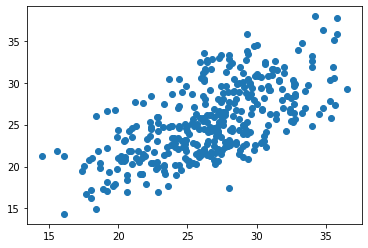

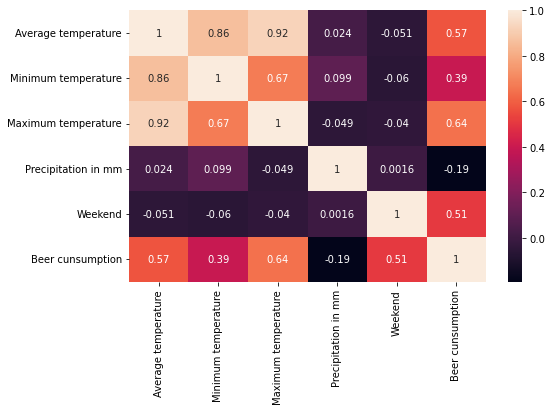

In [13]:

plt.scatter(data["Maximum temperature"],data["Beer cunsumption"])
plt.show()


plt.figure(figsize=(8,5))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

## 8.Split the dataset for training and testing

In [14]:
print(type(data["Maximum temperature"].values))

<class 'numpy.ndarray'>


In [15]:
X=data["Maximum temperature"].values.reshape(-1,1)
Y=data["Beer cunsumption"].values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)


## 9.Train a linear regression model and print the intercept and coefficients

In [17]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
reg.score(X_train,Y_train)
print(reg.coef_)
print(reg.intercept_)

[[0.66090784]]
[7.70762708]


## 10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error

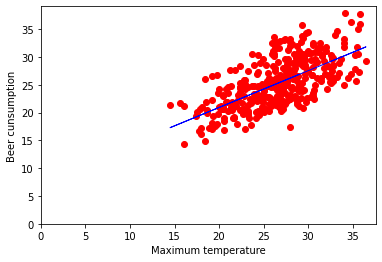

In [18]:
Y_pred=reg.predict(X)
plt.figure()
plt.scatter(data["Maximum temperature"],data["Beer cunsumption"],c="r")
plt.plot(data["Maximum temperature"],Y_pred,c="b",linewidth=1)
plt.xlabel("Maximum temperature")
plt.ylabel("Beer cunsumption")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

In [19]:

X2=sm.add_constant(X)
est=sm.OLS(Y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           6.55e-44
Time:                        02:18:36   Log-Likelihood:                -960.89
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     363   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9749      1.105      7.220      0.0

# Problem Statement 2

## 1.Load the data, check its shape and check for null values

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

In [21]:
df=pd.read_csv("C:/Users/MANISH/python/california_housing_train.csv")

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [25]:
df.shape

(17000, 9)

In [26]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [27]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


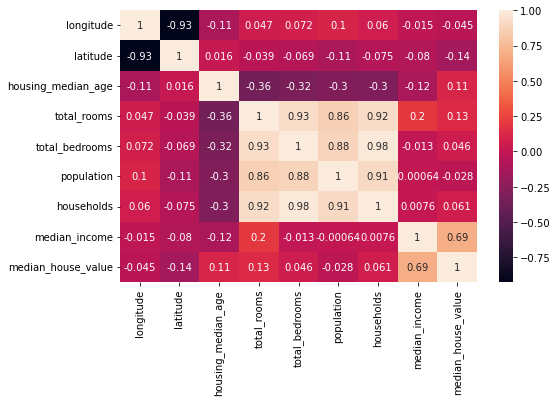

In [28]:
plt.figure(figsize=(8,5))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

## 2.Split the dataset for training and testing -1000 instances for testing

In [29]:
x=df[["housing_median_age","total_rooms","median_income"]].values
y=df["median_house_value"].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.8)

## 3.Train the model using sklearn (Apply linear regression to train a model for prediction)

In [31]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## 4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error

In [32]:
y_pred=reg.predict(x_test)
reg.predict([[20,1454,1.9250]])

array([101334.30813508])

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

59801.79736850535

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5189041157001355

## 5.Find coefficient and intercept using the trained model

In [37]:
reg.coef_

array([1.95319294e+03, 3.87739572e+00, 4.24881306e+04])

In [38]:
reg.intercept_

-25156.935486032133

# Problem Statement 3:

In [39]:
import pandas as pd 
import numpy as np

## 1.Load the data, check its shape and check for null values

In [86]:
data= pd.read_csv("C:/Users/MANISH/python/insurance.csv")

In [87]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
print('Data shape:', data.shape)

Data shape: (1338, 7)


## 2.Convert categorical featuresto numerical values (Use One-Hot Encoding)

In [89]:
data['sex'] = pd.factorize(data['sex'])[0]
data['smoker'] = pd.factorize(data['smoker'])[0]
data['region'] = pd.factorize(data['region'])[0]
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


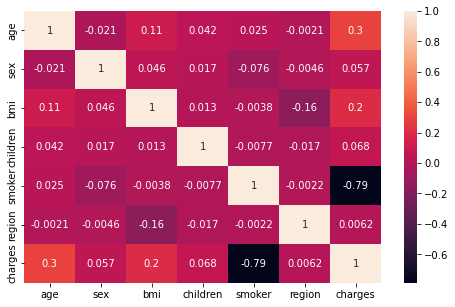

In [90]:
plt.figure(figsize=(8,5))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

## 3.Split the dataset for training and testing

In [91]:
x = data[['age','sex','bmi','children']]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_transform = ss.transform(x)
x_transform.reshape(-1,1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.2)



## 4.Train the model using sklearn –Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [93]:
reg.score(x_train,y_train)

0.12754824343772775

## 5.Find the intercept and coefficient from the trained model

In [94]:
print(reg.coef_)

[3536.28166838  839.88910445 1912.54942969  555.14384572]


In [95]:
print(reg.intercept_)

13193.086610329423


## 6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

In [96]:
y_pred=reg.predict(x_test)

In [97]:
reg.predict([[18,1,33.770,1]])

array([142827.9838321])

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10266223376048744

In [99]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

RMSE: 11479.322555869716


# Problem Statement 4:

## 1.Load the data, check its shape and check for null values

In [70]:
import pandas as pd

In [71]:
df=pd.read_csv("C:/Users/MANISH/python/50_Startups.csv")

In [72]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,NaN,135426.92,NaN,California,42559.73
48,542.05,51743.15,NaN,New York,35673.41
49,NaN,116983.80,45173.06,California,14681.40


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  47 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
df = df.rename(columns={'R&D Spend': 'RandD_Spend'})
df = df.rename(columns={'Marketing Spend': 'Marketing_Spend'})

df=df.fillna(df.RandD_Spend.mean())
df=df.fillna(df.Marketing_Spend.mean())

## 2.Convert categorical features to numerical values using Label Encoder

In [75]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df=df.apply(labelencoder.fit_transform)
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,48,34,47,2,49
1,47,41,46,0,48
2,46,11,45,1,47
3,45,22,44,2,46
4,44,6,43,1,45


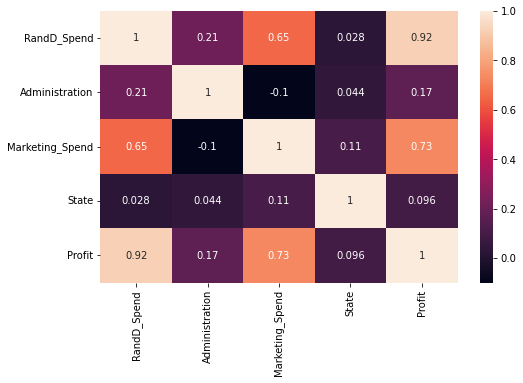

In [76]:
plt.figure(figsize=(8,5))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

## 3.Split the dataset for training and testing

In [77]:
x=df[['RandD_Spend','Marketing_Spend']].values
y=df[['Profit']].values

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## 4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model

In [79]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [80]:
print(reg.coef_)
print(reg.intercept_)

[[0.74255727 0.2875614 ]]
[-0.05849883]


## 5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

In [81]:
y_pred=reg.predict(x_test)
reg.predict([[48,47]])

array([[49.09963594]])

In [82]:
reg.score(x_test,y_test)

0.861468068380959

In [83]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

RMSE: 4.117972043310494


## 6.Regularize the model using Ridge Regression and find the Score

In [84]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.8614364320721781

## 7.Regularize the model using LassoRegression and find the Score 

In [85]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.8615630081064355